Exercises and code samples for the course Unsupervised and Reinforcement Learning (AAI-URL) in the Bachelor of AAI at Rosenheim University of Applied Sciences.


# t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a tool for data visualization. It reduces the dimensionality of data to 2 or 3 dimensions so that it can be plotted easily. Local similarities are preserved by this embedding.

t-SNE converts distances between data in the original space to probabilities. First, we compute conditional probabilites

$$p_{j|i} = \frac{\exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_j) / (2 \sigma_i^2)})}{\sum_{i \neq k} \exp{(-d(\boldsymbol{x}_i, \boldsymbol{x}_k) / (2 \sigma_i^2)})}, \quad p_{i|i} = 0,$$

which will be used to generate joint probabilities

$$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}.$$

The $\sigma_i$ will be determined automatically. This procedure can be influenced by setting the `perplexity` of the algorithm.

A heavy-tailed distribution will be used to measure the similarities in the embedded space

$$q_{ij} = \frac{(1 + ||\boldsymbol{y}_i - \boldsymbol{y}_j)||^2)^{-1}}{\sum_{k \neq l} (1 + ||\boldsymbol{y}_k - \boldsymbol{y}_l)||^2)^{-1}},$$

and then we minimize the Kullback-Leibler divergence

$$KL(P|Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

between both distributions with gradient descent (and some tricks). Note that the cost function is not convex and multiple runs might yield different results.

More information can be found in these resources and in the documentation from t-SNE:

* Website (Implementations, FAQ, etc.): [t-Distributed Stochastic Neighbor Embedding](http://homepage.tudelft.nl/19j49/t-SNE.html)
* Original paper: [Visualizing High-Dimensional Data Using t-SNE](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a

In [1]:
from sklearn.manifold import TSNE

help(TSNE)

Help on class TSNE in module sklearn.manifold._t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  TSNE(n_components=2, *, perplexity=30.0, early_exaggeration=12.0, learning_rate='warn', n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='warn', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None, square_distances='legacy')
 |  
 |  T-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  

## A simple example: the Iris dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

/home/marcel/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


t-SNE can help us to decide whether classes are separable in some linear or nonlinear representation. Here we can see that the 3 classes of the Iris dataset can be separated quite easily. They can even be separated linearly which we can conclude from the low-dimensional embedding of the `PCA`.

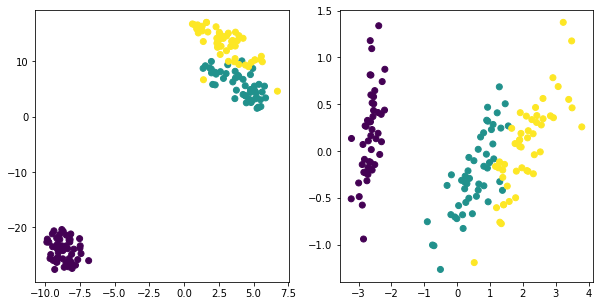

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.show()

## MNIST dataset

In [4]:
import numpy as np
import pandas as pd

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2023-11-26 11:52:10.137123: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 11:52:10.391940: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 11:52:10.393159: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 11:52:11.417935: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
import time
from sklearn.manifold import TSNE

X = np.zeros((x_train.shape[0], 784))
for i in range(x_train.shape[0]):
    X[i] = x_train[i].flatten()
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)
X = X.sample(frac=0.1, random_state=10).reset_index(drop=True)
Y = Y.sample(frac=0.1, random_state=10).reset_index(drop=True)

time_start = time.time()
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(X.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


/home/marcel/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/marcel/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 10.500221490859985 seconds


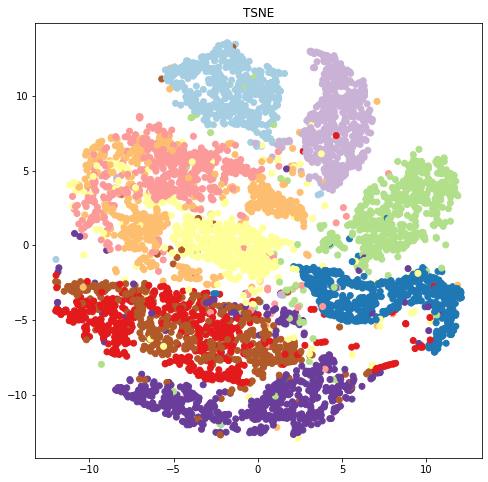

In [6]:
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=Y, 
    cmap=plt.cm.get_cmap('Paired'))